<a href="https://colab.research.google.com/github/Inno732/Data-Mining-Project-Jerome-Inno/blob/main/Exo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des librairies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

p1 = 0.1
p2 = 0.5
p3 = 0.9
n = 100

# Exo 1

Ici, pour n réalisation d'une variable aléatoire de paramètre (1, p, n) suivant une loi binomiale, on va mesurer la probabilité que l'erreur entre la moyenne empirique et p soit plus grande que epsilon pour plusieurs valeurs de epsilon. On va comparer ces probabilités d'erreurs avec la borne de Hoeffding.

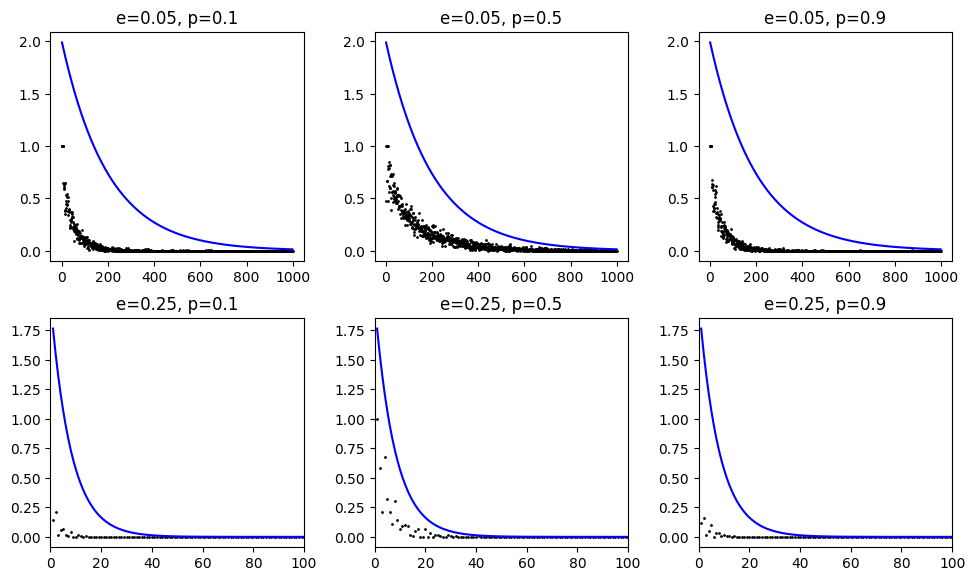

In [ ]:
p_array = np.array([p1, p2, p3])
n_array = range(1, 1000)
epsilon_array = [0.05, 0.25]

k = 100

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
fig.tight_layout(pad=2.0)

for i, p in enumerate(p_array): #for all p
    for j, epsilon in enumerate(epsilon_array): #for all epsilon
        true_values = []
        hoeffding_bound = []
        for n in n_array: #for each n (range(1, 1000))
            events_prob = 0
            for q in range(k): #generate k realization to compute proba
                random_variable = np.random.binomial(1, p, n)
                error = np.abs(np.mean(random_variable) - p)
                if error >= epsilon:
                    events_prob += 1
            proba = events_prob/k
            true_values.append(proba)
            hoeffding_bound.append(2*np.exp(-2*n*epsilon**2))
        if (j == 1):
            ax[j, i].set_xlim(0, 100)
        ax[j, i].scatter(n_array, true_values, label=f'p={p}, epsilon={epsilon}', s=1, color='black')
        ax[j, i].plot(n_array, hoeffding_bound, color="blue")
        ax[j, i].set_title("e=" + str(epsilon) + ", "+ "p=" + str(p))

### Dans quelles circonstances les bornes de Hoeffding sont-elles plus précises ? ###
=> Elles sont plus précises quand p = 0.5

### Pourquoi ces bornes sont-elles généralement des surrestimations ? ###
=> Car certaines distributions vont converger vers leur moyenne plus rapidement que Hoeffding

# Exo 2

### Exo 2.2 ###

Génération de deux nuages de points.

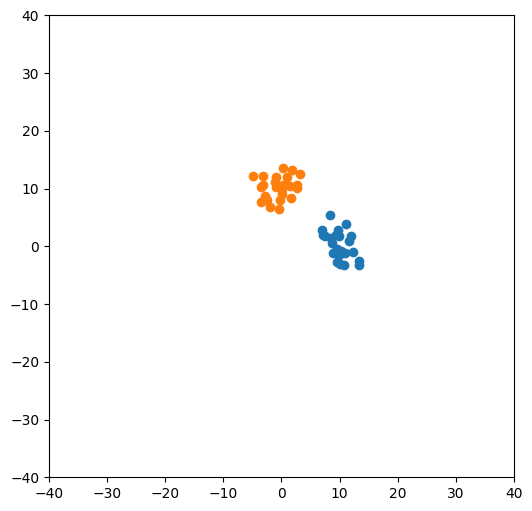

In [ ]:
x1, y1 = np.random.multivariate_normal([10, 0], [[3, 0], [0, 3]], 25).T
x2, y2 = np.random.multivariate_normal([0, 10], [[3, 0], [0, 3]], 25).T

plt.figure(figsize=(6, 6))
plt.xlim(-40, 40)
plt.ylim(-40, 40)
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

### Exo 2.3 ###

Génération d'un ensemble fini de classifieur linéaire.

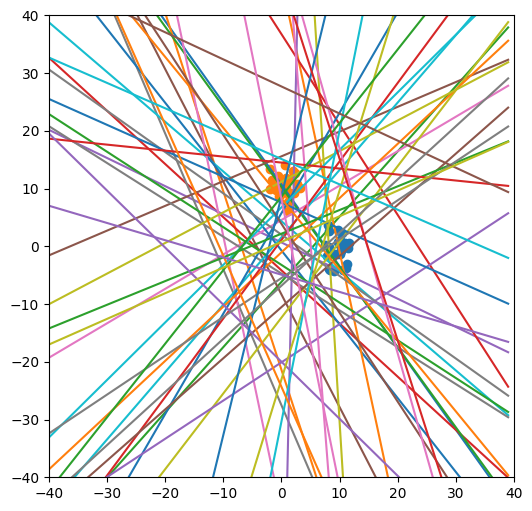

In [ ]:
plt.figure(figsize=(6, 6))
plt.xlim(-40, 40)
plt.ylim(-40, 40)
n_classifiers = 50

x1, y1 = np.random.multivariate_normal([10, 0], [[3, 0], [0, 3]], 25).T
x2, y2 = np.random.multivariate_normal([0, 10], [[3, 0], [0, 3]], 25).T

x_vals = range(-40, 40)
models_param = []
for classifier in range(n_classifiers):
    w1 = random.uniform(-2, 2)
    w2 = random.uniform(-2, 2)
    b = random.randrange(-20, 20)

    models_param.append((w1, w2, b))

    line = lambda x: (-w1/w2)*x - (b/w2)
    plt.plot(x_vals, [line(x) for x in x_vals])



plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

### Exo 2.5

Estimation du risque théorique de chaque classifieur. L'estimation est faite à partir d'un jeu de données extrêmement grand (n = 2*10e6). En effet, plus n est grand, plus le calcul de l'erreur devient précis ce qui est conforme au principe de l'inégalité de Hoeffding.

In [ ]:
x1, y1 = np.random.multivariate_normal([10, 0], [[3, 0], [0, 3]], 10**6).T
x2, y2 = np.random.multivariate_normal([0, 10], [[3, 0], [0, 3]], 10**6).T
theoretical_errors = []
for param in models_param:
    w1, w2, b = param
    model = lambda x, y: w1*x + w2*y + b
    error = 0
    for x, y in zip(x1, y1):
        if model(x, y) > 0:
            error += 1
    for x, y in zip(x2, y2):
        if model(x, y) < 0:
            error += 1
    error /= 2
    theoretical_errors.append(error/10**6)
print(theoretical_errors)

[0.2670255, 0.5, 0.987793, 0.5, 0.492833, 0.5000005, 0.9982695, 0.5, 0.928788, 0.511941, 0.5000375, 0.2273395, 0.2878945, 0.5, 0.057548, 0.4992715, 0.5, 0.5, 0.802662, 0.0003845, 0.9447525, 0.00011, 0.5000005, 0.9994035, 0.5, 0.617124, 0.99542, 0.4960945, 0.363184, 0.045691, 0.075792, 0.594555, 0.999789, 0.49756, 0.5, 0.4865485, 0.498054, 0.138767, 0.0254585, 0.99404, 0.215239, 0.5, 0.155097, 0.501986, 0.499999, 0.5, 0.2922565, 0.0778295, 0.0015145, 0.501746]


### Exo 2.4

Pour chaque classifieur on va calculer, pour 50 jeux de données différents générés par la même distribution gaussienne, son erreur empirique. On va répéter cette opération pour différentes tailles de datasets. On observe que plus n est grand et plus la variance de l'erreur diminue et converge vers l'erreur théorique.

N = 50

Text(0.5, 1.0, 'R_n(η) en points bleus, R(η) en trait rouge')

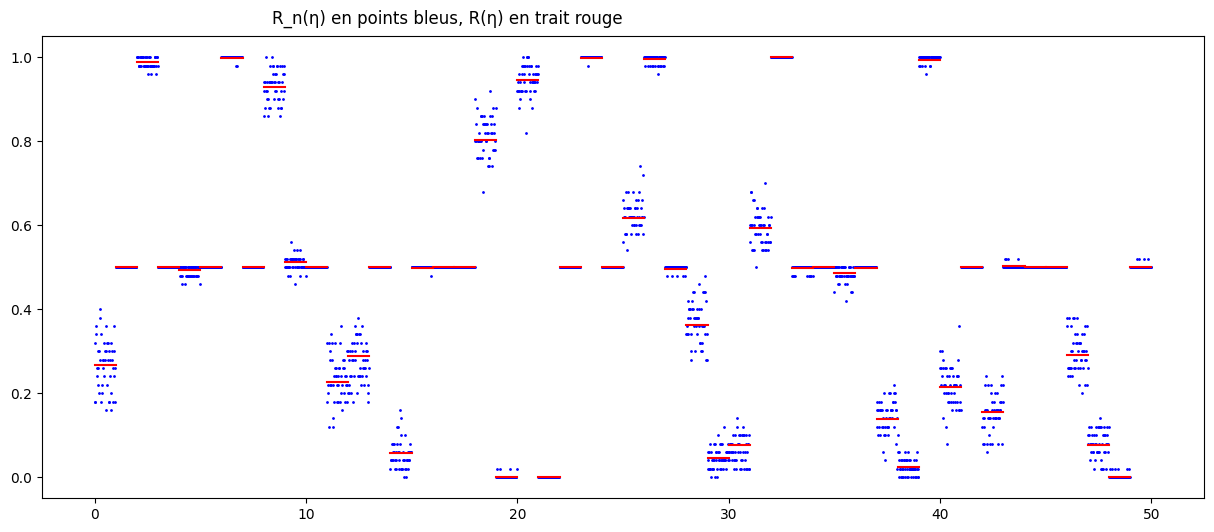

In [ ]:
risks = []
n=50

for param in models_param:
    model_risk = []
    for i in range(50):
        x1, y1 = np.random.multivariate_normal([10, 0], [[3, 0], [0, 3]], n//2).T
        x2, y2 = np.random.multivariate_normal([0, 10], [[3, 0], [0, 3]], n//2).T
        w1, w2, b = param
        model = lambda x, y: w1*x + w2*y + b
        error = 0
        for x, y in zip(x1, y1):
            if model(x, y) > 0:
                error += 1
        for x, y in zip(x2, y2):
            if model(x, y) < 0:
                error += 1
        model_risk.append(error/n)
    risks.append(model_risk)


plt.figure(figsize=(15, 6))

risks = [item for sublist in risks for item in sublist]
offset = 1/n
plt.scatter([i * offset for i in range(len(risks))], risks, s=1, color='blue', label='empirical risk')
for i, param in enumerate(models_param):
    plt.plot([i * 50 * offset, (i+1) * 50 *offset], [theoretical_errors[i], theoretical_errors[i]], color='red', label='theoretical risk')
plt.title('R_n(η) en points bleus, R(η) en trait rouge', ha='right', va='bottom')

N = 500

Text(0.5, 1.0, 'R_n(η) en points bleus, R(η) en trait rouge')

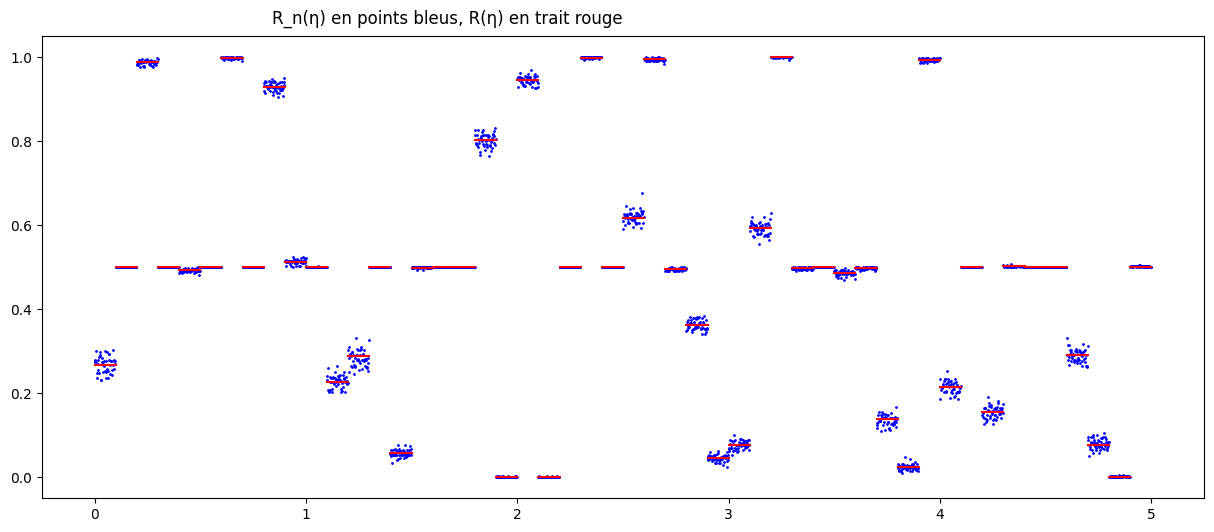

In [ ]:
risks = []
n=500

for param in models_param:
    model_risk = []
    for i in range(50):
        x1, y1 = np.random.multivariate_normal([10, 0], [[3, 0], [0, 3]], n//2).T
        x2, y2 = np.random.multivariate_normal([0, 10], [[3, 0], [0, 3]], n//2).T
        w1, w2, b = param
        model = lambda x, y: w1*x + w2*y + b
        error = 0
        for x, y in zip(x1, y1):
            if model(x, y) > 0:
                error += 1
        for x, y in zip(x2, y2):
            if model(x, y) < 0:
                error += 1
        model_risk.append(error/n)
    risks.append(model_risk)


plt.figure(figsize=(15, 6))

risks = [item for sublist in risks for item in sublist]
offset = 1/n
plt.scatter([i * offset for i in range(len(risks))], risks, s=1, color='blue', label='empirical risk')
for i, param in enumerate(models_param):
    plt.plot([i * 50 * offset, (i+1) * 50 *offset], [theoretical_errors[i], theoretical_errors[i]], color='red', label='theoretical risk')
plt.title('R_n(η) en points bleus, R(η) en trait rouge', ha='right', va='bottom')


N = 5000

Text(0.5, 1.0, 'R_n(η) en points bleus, R(η) en trait rouge')

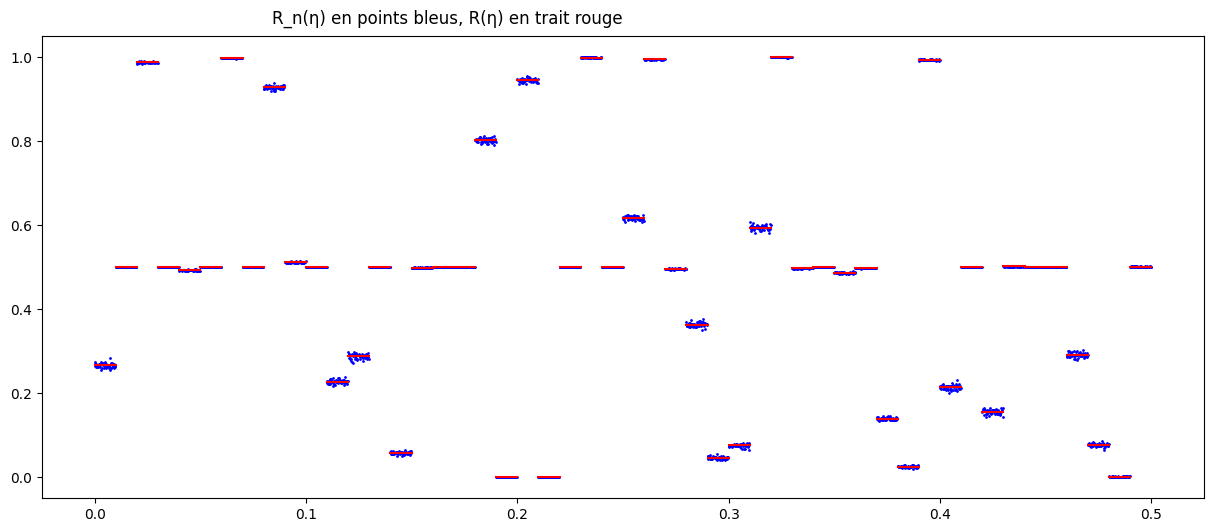

In [ ]:
risks = []
n=5000

for param in models_param:
    model_risk = []
    for i in range(50):
        x1, y1 = np.random.multivariate_normal([10, 0], [[3, 0], [0, 3]], n//2).T
        x2, y2 = np.random.multivariate_normal([0, 10], [[3, 0], [0, 3]], n//2).T
        w1, w2, b = param
        model = lambda x, y: w1*x + w2*y + b
        error = 0
        for x, y in zip(x1, y1):
            if model(x, y) > 0:
                error += 1
        for x, y in zip(x2, y2):
            if model(x, y) < 0:
                error += 1
        model_risk.append(error/n)
    risks.append(model_risk)


plt.figure(figsize=(15, 6))

risks = [item for sublist in risks for item in sublist]
offset = 1/n
plt.scatter([i * offset for i in range(len(risks))], risks, s=1, color='blue', label='empirical risk')
for i, param in enumerate(models_param):
    plt.plot([i * 50 * offset, (i+1) * 50 *offset], [theoretical_errors[i], theoretical_errors[i]], color='red', label='theoretical risk')
plt.title('R_n(η) en points bleus, R(η) en trait rouge', ha='right', va='bottom')

### Exo 2.6

Ici on va se concentrer sur la troisième version de l'inégalité de Hoeffding concernant la borne de l'erreur R(g) - Rn(g).

Pour cela, on va calculer l'erreur par rapport à l'erreur théorique de chaque classifieur un nombre suffisant de fois en prenant le maximum à chaque essai. On va représenter en histograme ces déviations maximales par rapport à l'erreur théorique.

In [ ]:
n_classifiers = 50
n = 1000
max_difference = []

for k in range(5000):
    x1, y1 = np.random.multivariate_normal([10, 0], [[3, 0], [0, 3]], n//2).T
    x2, y2 = np.random.multivariate_normal([0, 10], [[3, 0], [0, 3]], n//2).T
    risks = []
    for param in models_param:
        w1, w2, b = param
        model = lambda x, y: w1*x + w2*y + b

        error = 0
        for x, y in zip(x1, y1):
            if model(x, y) > 0:
                error += 1
        for x, y in zip(x2, y2):
            if model(x, y) < 0:
                error += 1
        risks.append(error/n)

    max_difference.append(max(abs(risk - theoretical_errors[i]) for i, risk in enumerate(risks)))

Text(0.5, 0, 'max_η|R_n(η)-R(η)|')

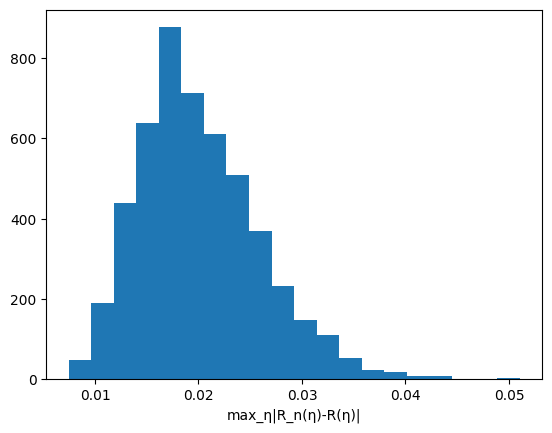

In [ ]:
plt.hist(max_difference, bins=20)
plt.xlabel('max_η|R_n(η)-R(η)|')

On classe ensuite ces déviations maximales par ordre croissant et on les affiche entre 0 et 1 afin de les comparer avec le résultat de la borne de Hoeffding.

On observe donc bien que la borne de Hoeffding surrestime l'écart entre l'erreur empirique et l'erreur théorique mais que la borne est plus précise pour des petites valeurs de delta.

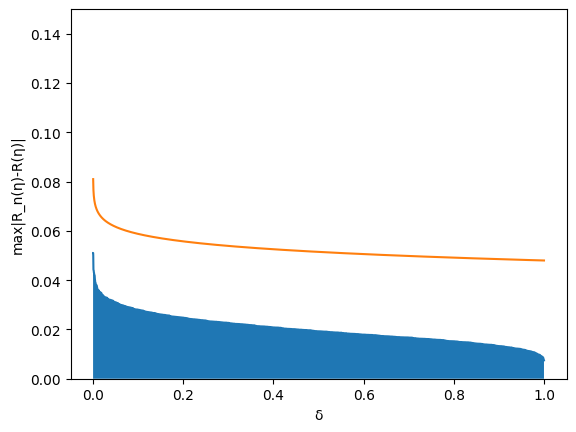

In [ ]:
offset = 1/len(max_difference)
max_difference.sort(reverse=True)


plt.ylim(0, 0.15)
x = [i * offset for i in range(len(max_difference))]
y = max_difference

plt.plot(x, y)
plt.fill_between(x, y)
x.remove(0)
bound = lambda x : math.sqrt((1/(2*n))*(np.log((2*n_classifiers)/x)))
y = [bound(val) for val in x]
plt.ylabel('max_g|R_n(η)-R(η)|')
plt.xlabel('δ')
plt.plot(x, y)

In [ ]:
offset = 1/len(max_difference)
max_difference.sort(reverse=True)


plt.ylim(0, 0.15)
x = [i * offset for i in range(len(max_difference))]
y = max_difference

plt.xlim(0, 0.015)
plt.plot(x, y)
plt.fill_between(x, y)
x.remove(0)
bound = lambda x : math.sqrt((1/(2*n))*(np.log((2*n_classifiers)/x)))
y = [bound(val) for val in x]
plt.plot(x, y)